In [2]:
from clearml.automation.controller import PipelineDecorator
from clearml import TaskTypes


# @PipelineDecorator.component(
#     return_values=["the_dataset"], cache=False, task_type=TaskTypes.data_processing
# )
def make_new_dataset_component(project, i_dataset, num_samples_per_chunk=500):
    from image_classifier_training.pipeline_functions import make_new_dataset
    return make_new_dataset(project, i_dataset, num_samples_per_chunk=500)
    


# @PipelineDecorator.component(
#     return_values=["run_model_path", "run_tb_path"],
#     cache=False,
#     task_type=TaskTypes.training,
# )
def train_image_classifier_component(
    clearml_dataset, backbone_name, run_model_uri, run_tb_uri, local_data_path="/data"
):
    from image_classifier_training.pipeline_functions import train_image_classifier

    return train_image_classifier(
        clearml_dataset,
        backbone_name,
        run_model_uri,
        run_tb_uri,
        local_data_path="/data",
    )


# from clearml import Task
# @PipelineDecorator.pipeline(
#     name="fastai_image_classification_pipeline",
#     project="lavi-testing",
#     version="0.2",
#     multi_instance_support=True,
# )
def fastai_image_classification_pipeline(run_id, i_dataset, backbone_name="resnet34"):
    from clearml import Task

    class TaskURIs:
        def __init__(self, project, pipeline_name, run_id):
            path_pref = f"{project}/{pipeline_name}"
            self.tboard = f"{path_pref}/tboard/{run_id}"
            self.models = f"{path_pref}/models/{run_id}"
            self.evaluations = f"{path_pref}/evaluations/{run_id}"
    project_name = "lavi-testing"
    pipeline_name = "fastai_image_classification"
    

    pipeline_task = Task.current_task()
    print("pipeline task=", pipeline_task)
    config = {"run_id": run_id}
    config["backbone_name"] = backbone_name
    config["i_dataset"] = backbone_name

    print("run_id:", run_id)

    if pipeline_task:
        config = pipeline_task.connect_configuration(config, name="run_config")

    print("make dataset")
    training_dataset = make_new_dataset_component(
        project=project_name, i_dataset=i_dataset, num_samples_per_chunk=500
    )
    config["training_dataset"] = {
        "id": training_dataset.id,
        "name": training_dataset.name,
    }

    run_uris = TaskURIs(
        project=project_name, pipeline_name=pipeline_name, run_id=run_id
    )

    config["run_uris"] = json.loads(json.dumps(vars(run_uris), default=str))

    print("train model")
    run_model_path, run_tb_path = run_learner_path = train_image_classifier_component(
        clearml_dataset=training_dataset,
        backbone_name=backbone_name,
        run_model_uri=run_uris.models,
        run_tb_uri=run_uris.tboard,
        local_data_path="/data",
    )
    #     config["run_learner_path"] = str(run_learner_path)

    #     print("evaluate model")
    #     run_eval_path = eval_model(
    #         run_learner_path,
    #         run_dataset_path,
    #         run_splits_path,
    #         run_id,
    #         task_paths.evaluations_path,
    #     )
    #     config["run_eval_path"] = str(run_eval_path)
    #     # clearml_task.close()

    print("pipeline complete")

    return config

pipeline task= None
run_id: run_1
make dataset
train model


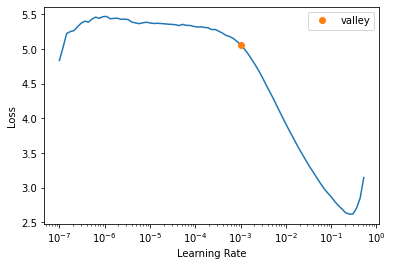

epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,top_1_accuracy,top_2_accuracy,top_3_accuracy,time
0,5.184540,4.033679,0.020000,0.980000,0.020000,0.020000,0.020000,0.070000,0.110000,00:06


Better model found at epoch 0 with valid_loss value: 4.033679008483887.


epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,top_1_accuracy,top_2_accuracy,top_3_accuracy,time
0,4.508452,3.361179,0.110000,0.890000,0.110000,0.110000,0.110000,0.220000,0.290000,00:08
1,4.106317,2.986375,0.180000,0.820000,0.180000,0.180000,0.180000,0.310000,0.450000,00:08


Better model found at epoch 0 with valid_loss value: 3.3611788749694824.
Better model found at epoch 1 with valid_loss value: 2.986374616622925.
sample validation results


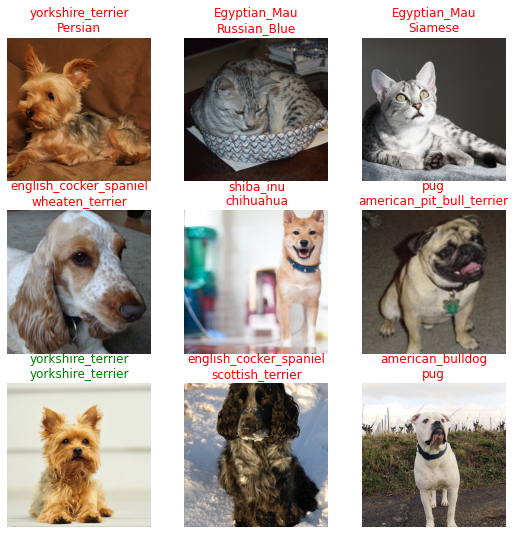

run_learner_path /data/lavi-testing/fastai_image_classification/models/run_1
train_image_classifier completed
pipeline complete


{'run_id': 'run_1',
 'backbone_name': 'resnet34',
 'i_dataset': 'resnet34',
 'training_dataset': {'id': '3a837fc8106d4ed89651bb80ee6fba84',
  'name': 'pets_data_0'},
 'run_uris': {'tboard': 'lavi-testing/fastai_image_classification/tboard/run_1',
  'models': 'lavi-testing/fastai_image_classification/models/run_1',
  'evaluations': 'lavi-testing/fastai_image_classification/evaluations/run_1'}}

In [3]:
    
from datetime import datetime
run_id = f"run_{datetime.utcnow().strftime('%Y_%m_%dT%H_%M_%S.%f')[:-3]}"
#PipelineDecorator.run_locally()
fastai_image_classification_pipeline(run_id = "run_1", i_dataset=0, backbone_name="resnet34")

In [4]:
!pip list

Package                           Version     Editable project location
--------------------------------- ----------- -------------------------------------------------
absl-py                           1.1.0
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
asttokens                         2.0.5
attrs                             21.4.0
backcall                          0.2.0
beautifulsoup4                    4.11.1
black                             22.6.0
bleach                            5.0.1
blis                              0.7.8
cachetools                        5.2.0
catalogue                         2.0.7
certifi                           2022.6.15
cffi                              1.15.1
charset-normalizer                2.1.0
clearml                           1.6.2
click                             8.1.3
cycler                            0.11.0
cymem                             2.0.6
debugpy                           1.6.0
decorator            

In [ ]:
# class TaskURIs:
#     def __init__(self, project, pipeline_name, run_id):
#         path_pref = f"{project}/{pipeline_name}"
#         self.tboard = f"{path_pref}/tboard/{run_id}"
#         self.models = f"{path_pref}/models/{run_id}"
#         self.evaluations = f"{path_pref}/evaluations/{run_id}"

# from datetime import datetime
# pipeline_name = "fastai_image_classification"
# run_id = f"run_{datetime.utcnow().strftime('%Y_%m_%dT%H_%M_%S.%f')[:-3]}"
# run_uris= TaskURIs(project="lavi-tests", pipeline_name=pipeline_name, run_id=run_id)
# json.loads(json.dumps(vars(run_uris), default=str))

In [ ]:
!pip install -e ./image_classifier_training/